In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - 1 Detection : microsoft/table-transformer-detection (0.989)

In [2]:
!pip install timm

In [3]:
from transformers import TableTransformerModel, TableTransformerConfig

configuration = TableTransformerConfig()
model = TableTransformerModel(configuration)
configuration = model.config

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [4]:
from transformers import AutoImageProcessor, TableTransformerModel
from huggingface_hub import hf_hub_download
from PIL import Image

file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="example_pdf.png")
image = Image.open(file_path).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerModel.from_pretrained("microsoft/table-transformer-detection")

# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

# forward pass
outputs = model(**inputs)

# the last hidden states are the final query embeddings of the Transformer decoder
# these are of shape (batch_size, num_queries, hidden_size)
last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

example_pdf.png:   0%|          | 0.00/1.45M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

[1, 15, 256]

In [5]:
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch

file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="example_pdf.png")
image = Image.open(file_path).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassif

Detected table with confidence 1.0 at location [202.1, 210.59, 1119.22, 385.09]


In [6]:
# PNG 파일 경로 지정
file_path = "/content/drive/MyDrive/Ybigta/0105 huggingface/table2.png"

# 이미지 열기
image = Image.open(file_path).convert("RGB")

image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassif

Detected table with confidence 0.989 at location [618.58, 672.73, 1110.77, 940.52]


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassif

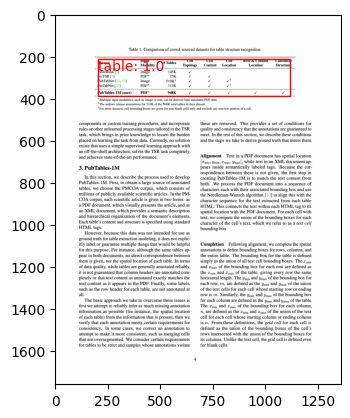

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 이미지 다운로드 및 열기
file_path = hf_hub_download(repo_id="nielsr/example-pdf", repo_type="dataset", filename="example_pdf.png")
image = Image.open(file_path).convert("RGB")

# 이미지 프로세서 및 모델 초기화
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

# 이미지를 모델 입력 형식으로 변환
inputs = image_processor(images=image, return_tensors="pt")

# 모델에 이미지 전달 및 결과 가져오기
outputs = model(**inputs)

# 결과를 Pascal VOC 형식으로 변환
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# 이미지 시각화
fig, ax = plt.subplots(1)
ax.imshow(image)

# 각 객체에 대한 경계 상자 및 레이블 시각화
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]

    # 경계 상자 시각화
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

    # 레이블 및 신뢰도 표시
    label_str = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    ax.text(box[0], box[1], label_str, color="r", verticalalignment="top")

plt.show()

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
Some weights of the model checkpoint at microsoft/table-transformer-detection were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassif

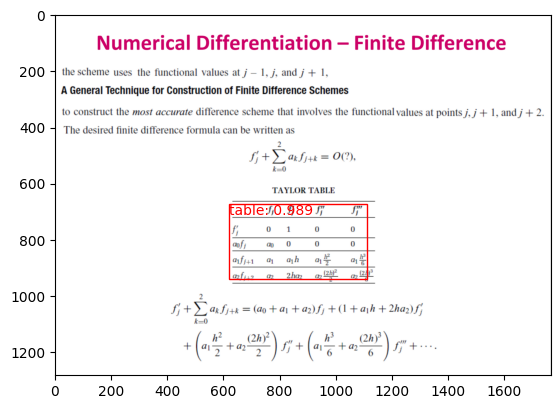

In [8]:
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 이미지 파일 경로 지정
file_path = "/content/drive/MyDrive/Ybigta/0105 huggingface/table2.png"

# 이미지 열기
image = Image.open(file_path).convert("RGB")

# 이미지 프로세서 및 모델 초기화
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

# 이미지를 모델 입력 형식으로 변환
inputs = image_processor(images=image, return_tensors="pt")

# 모델에 이미지 전달 및 결과 가져오기
outputs = model(**inputs)

# 결과를 Pascal VOC 형식으로 변환
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# 이미지 시각화
fig, ax = plt.subplots(1)
ax.imshow(image)

# 각 객체에 대한 경계 상자 및 레이블 시각화
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]

    # 경계 상자 시각화
    rect = patches.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

    # 레이블 및 신뢰도 표시
    label_str = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"
    ax.text(box[0], box[1], label_str, color="r", verticalalignment="top")

plt.show()

# 1 - 2 Detection : TahaDouaji/detr-doc-table-detection (0.975)

In [11]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

image = Image.open("/content/drive/MyDrive/Ybigta/0105 huggingface/table2.png").convert("RGB")

processor = DetrImageProcessor.from_pretrained("TahaDouaji/detr-doc-table-detection")
model = DetrForObjectDetection.from_pretrained("TahaDouaji/detr-doc-table-detection")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )


Some weights of the model checkpoint at TahaDouaji/detr-doc-table-detection were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Detected table with confidence 0.975 at location [627.2, 670.67, 1134.12, 975.56]


Some weights of the model checkpoint at TahaDouaji/detr-doc-table-detection were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


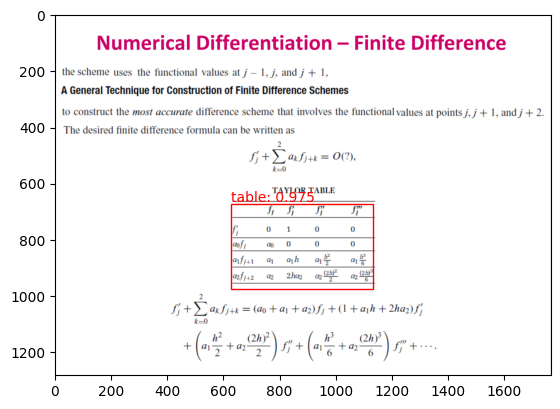

In [12]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/Ybigta/0105 huggingface/table2.png"
image = Image.open(image_path).convert("RGB")

processor = DetrImageProcessor.from_pretrained("TahaDouaji/detr-doc-table-detection")
model = DetrForObjectDetection.from_pretrained("TahaDouaji/detr-doc-table-detection")

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# Plot the image with bounding boxes
fig, ax = plt.subplots(1)
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_text = f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}"

    # Draw bounding box
    rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    # Add label text
    ax.text(box[0], box[1] - 5, label_text, color='r')

plt.show()


# 2 : NLP 모델 fine tuning

In [32]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-multilingual-cased')
unmasker("Hello I'm a [MASK] model.")

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.10182034224271774,
  'token': 13192,
  'token_str': 'model',
  'sequence': "Hello I'm a model model."},
 {'score': 0.0521264411509037,
  'token': 11356,
  'token_str': 'world',
  'sequence': "Hello I'm a world model."},
 {'score': 0.04893026128411293,
  'token': 11165,
  'token_str': 'data',
  'sequence': "Hello I'm a data model."},
 {'score': 0.02036016434431076,
  'token': 23578,
  'token_str': 'flight',
  'sequence': "Hello I'm a flight model."},
 {'score': 0.020079676061868668,
  'token': 14155,
  'token_str': 'business',
  'sequence': "Hello I'm a business model."}]

In [26]:
# from transformers import BertTokenizer, TFBertModel
# tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
# model = TFBertModel.from_pretrained("bert-base-multilingual-cased")
# text = "As I deal with real history almost as it is, I get angry while watching it, but it's very immersive because it's cinematically interesting. Every time I watch it, it looks new. It's a work that has both meaning and fun!"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)

In [33]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="bert-base-multilingual-cased")

# Perform sentiment analysis on a given text
text = "As I deal with real history almost as it is, I get angry while watching it, but it's very immersive because it's cinematically interesting. Every time I watch it, it looks new. It's a work that has both meaning and fun!"
result = sentiment_analysis(text)

# Print the sentiment analysis result
for r in result:
    print(f"Sentiment: {r['label']}, Score: {r['score']}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment: LABEL_1, Score: 0.5395877361297607


LABEL_0: negative를,
LABEL_1: positive를 의미한다.
결과적으로 약간 긍정적인 결과가 나온 것을 확인할 수 있다.